# Name: Sugam Jain
# Email: sugamjain2000@gmail.com
# LinekdIn: https://www.linkedin.com/in/sugam-jain/
# Github: https://github.com/SugamJain
# Contact Number: +91 8437900196

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [3]:
df=pd.read_csv('Fraud.csv',encoding='latin1')

# Performing EDA

In [4]:
# READING SHAPE OF DATASET

df.shape

(6362620, 11)

In [5]:
#DISPLAYING TO 10 DATA ROWS AND COLUMNS

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Now, since the columns 'step', 'nameOrig' and 'nameDest' would not play any role in predicting the outcome, hence I am droping them and formin a new dataset with name 'df1'.

In [6]:
df1 = df.drop(columns=['step', 'nameOrig', 'nameDest'])

In [7]:
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
df1.shape

(6362620, 8)

In [9]:
df1.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#DISPLAYIING THE INFORMATION OF THE new DATASET
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


### Determining the null values, if present.

In [11]:
df1.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Determining the duplicate values, if present.

In [12]:
df.duplicated().sum()

0

### Dscribing the dataset

In [13]:
df1.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Displaying the correlations between the features

Determining the correlations between different features helps to know which features are related with each other with what strength.

In [14]:
df1.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


### Drawing the heatmap to better understand the correlations between features.

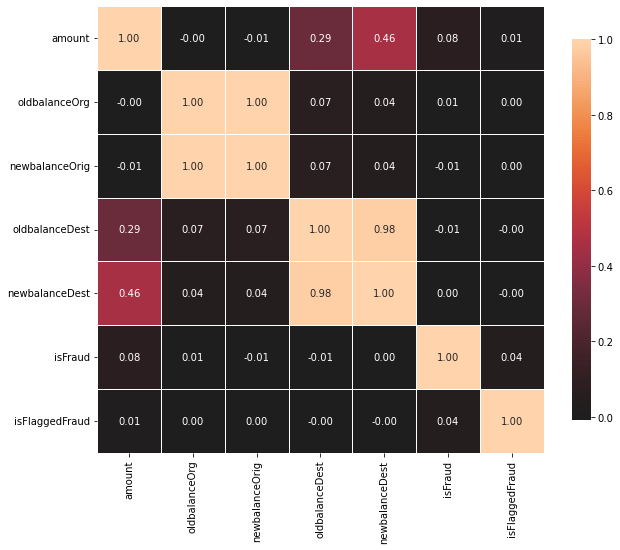

In [15]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df1)

### Conclusion from correlation heatmap
1. From the above heatmap, it is clear that the feature 'oldbalanceOrg' has high correlation with 'newbalanceorg' and feature 'oldbalanceDest' has high correlation with 'newbalanceDest'. 

2. Therefore, we can drop either one of them in both cases.

3. But here, I am finding new information which is the difference between the new balance and the old balance for both 'Org' and 'Dest' and storing them under the new column names 'finalbalanceOrig' and 'finalbalanceDest' respectively.

4. Finally, I am droping the original columns 'oldbalanceOrg','newbalanceorg','oldbalanceDest' and 'newbalanceDest'.

In [16]:
df1["finalbalanceOrig"] = df1['newbalanceOrig'] - df1['oldbalanceOrg']
df1["finalbalanceDest"] = df1['newbalanceDest'] - df1['oldbalanceDest']

In [17]:
df3 = df1.drop(columns=['oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

### Displaying the new dataset.

In [18]:
df3.head(10)

,type,amount,isFraud,isFlaggedFraud,finalbalanceOrig,finalbalanceDest
0,PAYMENT,9839.64,0,0,-9839.64,0.00
1,PAYMENT,1864.28,0,0,-1864.28,0.00
2,TRANSFER,181.00,1,0,-181.00,0.00
3,CASH_OUT,181.00,1,0,-181.00,-21182.00
4,PAYMENT,11668.14,0,0,-11668.14,0.00
5,PAYMENT,7817.71,0,0,-7817.71,0.00
6,PAYMENT,7107.77,0,0,-7107.77,0.00
7,PAYMENT,7861.64,0,0,-7861.64,0.00
8,PAYMENT,4024.36,0,0,-2671.00,0.00
9,DEBIT,5337.77,0,0,-5337.77,-1549.21


### Determining the unique columns in 'type' column.

In [19]:
df3['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Performing OneHot Encoding on 'type'.

1. Since there are only 5 unique values in 'type' column, I am converting these categorical values to numerical values be performing onehot encoding.



2. The dataset with name 'df3' becomes my final dataset which I will be using to train the ML model.

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# transforming the column after fitting
enc = enc.fit_transform(df3[['type']]).toarray()

# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)

# concating dataframes 
df3 = pd.concat([df3, encoded_colm], axis = 1) 

# removing the encoded column.
df3 = df3.drop(['type'], axis = 1) 
df3.head(10)

,amount,isFraud,isFlaggedFraud,finalbalanceOrig,finalbalanceDest,0,1,2,3,4
0,9839.64,0,0,-9839.64,0.00,0.0,0.0,0.0,1.0,0.0
1,1864.28,0,0,-1864.28,0.00,0.0,0.0,0.0,1.0,0.0
2,181.00,1,0,-181.00,0.00,0.0,0.0,0.0,0.0,1.0
3,181.00,1,0,-181.00,-21182.00,0.0,1.0,0.0,0.0,0.0
4,11668.14,0,0,-11668.14,0.00,0.0,0.0,0.0,1.0,0.0
5,7817.71,0,0,-7817.71,0.00,0.0,0.0,0.0,1.0,0.0
6,7107.77,0,0,-7107.77,0.00,0.0,0.0,0.0,1.0,0.0
7,7861.64,0,0,-7861.64,0.00,0.0,0.0,0.0,1.0,0.0
8,4024.36,0,0,-2671.00,0.00,0.0,0.0,0.0,1.0,0.0
9,5337.77,0,0,-5337.77,-1549.21,0.0,0.0,1.0,0.0,0.0


#### Displaying the heatmap for new dataset with onehot encoded data.

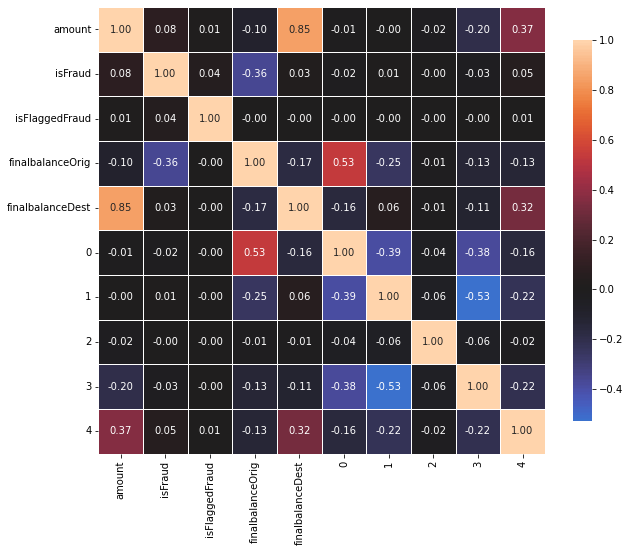

In [21]:
correlation_heatmap(df3)

## MODEL DEVELOPMENT

### Separating the feature and the Label columns 

In [22]:
x=df3.drop(labels='isFraud', axis=1)
y= df3['isFraud']

In [23]:
x.head()

,amount,isFlaggedFraud,finalbalanceOrig,finalbalanceDest,0,1,2,3,4
0,9839.64,0,-9839.64,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,0,-1864.28,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,0,-181.00,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,0,-181.00,-21182.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,0,-11668.14,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

### As the datapoints differ a lot in magnitude, I'll scale them

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

### Splitting the total dataset into training(70%) and testing dataset(30%)

In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

### Feeding the training dataset to ML model

Here, I am using XGBoost ensemble learning techique for training of the model.

In [27]:
# fit model no training data
!pip install xgboost

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier

#### Training the Model

In [29]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

### Calculating the training and testing accuracies.

TRAINING ACCURACY

In [30]:
from sklearn.metrics import accuracy_score

# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9996160611284569

TESTING ACCURACY

In [31]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.9996023650634487

## SAVING THE MODEL

In [32]:
import pickle

In [33]:
filename = 'xgboost_model.pickle'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

# Important Aspects of the model

#### Task 1: Data cleaning including missing values, outliers and multi-collinearity:

1. In the given dataset, there were no missing values.



2. I was not able to show the outlier detection because of RAM issues. I tried to display outliers using the boxplots and Z-score value. The outliers could have been removed using Quantile based flooring and capping or Mean/Median imputation.



3. Heatmaps are used to display the corelations among features. Features with considerable correlation values are handeled by computing a different information from them as shown above.


#### Task 2: Describe your fraud detection model in elaboration.

-> After cleaning the data and performing exploratory data analysis on the it, the produced dataset is used in training of the machine learning model.


-> In this particular task, I have used XGBoost classification algorithm to develop the model.

XGBoost improves the gradient boosting method even further.

XGBoost (extreme gradient boosting) regularises data better than normal gradient boosted Trees.

It was developed by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ( 𝑗  trees). In the formula  𝑓𝑗  means a prediction coming from the  𝑗𝑡ℎ  tree.

                                            𝑜𝑏𝑗(𝜃)=∑𝑖𝑛𝑙(𝑦𝑖−𝑦𝑖^)+∑𝑗=1𝑗Ω(𝑓𝑗)
 
Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

                                            Ω(𝑓)=𝛾𝑇+12𝜆∑𝑗=1𝑇𝑤2𝑗
 
First part ( 𝛾𝑇 ) is responsible for controlling the overall number of created leaves, and the second term ( 12𝜆∑𝑇𝑗=1𝑤2𝑗 ) watches over the scores.

Mathematics Involved Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the number of residuals and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:


where L is the loss function.

Initialise the tree with only one leaf.
compute the similarity using the formula
                                        𝑆𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦=𝐺𝑟𝑎𝑑𝑖𝑒𝑛𝑡2ℎ𝑒𝑠𝑠𝑖𝑎𝑛+𝜆
Where 𝜆 is the regularisation term.
Now for splitting data into a tree form, calculate
                            𝐺𝑎𝑖𝑛=𝑙𝑒𝑓𝑡𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦+𝑟𝑖𝑔ℎ𝑡𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦−𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦𝑓𝑜𝑟𝑟𝑜𝑜𝑡
For tree pruning, the parameter 𝛾 is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of 𝛾.
If 𝐺𝑎𝑖𝑛−𝛾<0, remove that branch. Else, keep the branch

Learning is done using the equation
𝑁𝑒𝑤𝑉𝑎𝑙𝑢𝑒=𝑜𝑙𝑑𝑉𝑎𝑙𝑢𝑒+𝜂∗𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛
where 𝜂 is the learning rate.


#### Task 3: How did you select variables to be included in the model?

1. The list variables or features are - [step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud]. 



2. Out of these features, 'step', 'nameOrig', and 'nameDest' are the features which have no role to play in prediction a trasaction being fraud or not. This is because these are just the unique string values, which can be ignored. 



3. The main role for classifying a prediction as fraud or not are played by the difference between the original and new_balance amount in the accounts of sender and receiver, further depending upon the 'type of transaction'. Therefore, the features considered for classification tasks are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest and type. 



4. 'isFraud' is considered as the column of labels in the supervised learning model.

#### Task 4: Demonstrate the performance of the model by using best set of tools

1. The perfomance metrice I have used over here is accuracy. accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data.



2. I preffered to use accuracy over other perfomance measuring metrices like precision, F1 Score etc. because accuracy tells the measure of correct classification, which is utmost necessary to know, so that a Fraud transaction can be detected effectively.



3. At any cost, the company can not entertain the mistake of a actual fraud transaction being classified as 'not fraud' and a 'not fraud' transaction being classified as 'fraud'. 
If any such mistake happens, it would adversely affect the reputation of the bank or company.

#### Task 5: What are the key factors that predict fraudulent customer? 




Some of the important factors that play a majour role in predicting a fradulant customer are:

1. Customer's identity (email addresses, credit card numbers, etc.)
2. The past order details.
3. Their preferred payment methods,
4. The locations they have used for the transactions.
5. Their network (emails, phone numbers, and payment details entered with the online account).


#### Task 6: Do these factors make sense? If yes, How? If not, How not? 


In my point of view, yes! definitly the above mentioned points make sense.

1. Customer's identity is necessary to identify him or her so that further necessary action can be taken.



2. The history of the orders help in knowing what kind of transaction does the customer makes usually, so that an unusual transaction can be detected.



3. The location of the customer where he/she makes most of the transactions should be stored to know if any other location which maybe far away from the usual location can be determined, as it could be a posible fraud transaction.



4. Customer's personal information like his emails, payment details etc can be possible source through which  fraud could have been conducted.

#### Task 7: What kind of prevention should be adopted while company update its infrastructure?

While updating the infrastructure of the company, in general, following preventions should be considered:

1. Understand your work, understand your necessary requirements, then update the infrastructure.


2. The dependability of your candidate infrastructure must be accessed.


3. Think about legal and ethical issues.


4. Consider financial issues. Over bugeting must be avoided.


5. Wastage of reusable material should be avoided.


6. Prevent employees from overusing the company resources.


#### Task 8: Assuming these actions have been implemented, how would you determine if they work?

This task can be performed at 4 levels:

1. Physical Level: Infrastructure needs physical protection in the form of locked doors, fences, backup generators, security cameras and the like. Failover plans that locate backup equipment in another part of the world are also a part of a physical security strategy.



2. Network Level: At its core, network security protects data as it travels into, out of and across the network. This includes traffic encryption, whether it is on-premises or in the cloud, proper firewall management and the use of authentication and authorization systems.



3. Application Level: Security also needs to be considered at the application level. This includes protection of databases against attacks such as SQL injections as well as the hardening of other applications against unauthorized use or malicious exploits.



4. Data Level: At the lowest level of infrastructure security, data protection must be considered, no matter where or how it is stored. This includes data encryption, backups and anonymization tactics where they are appropriate.
